In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [11]:
import pandas as pd
df = pd.read_csv("Iris.csv")
X = df.drop(['Id', 'Species'], axis=1).values

In [12]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


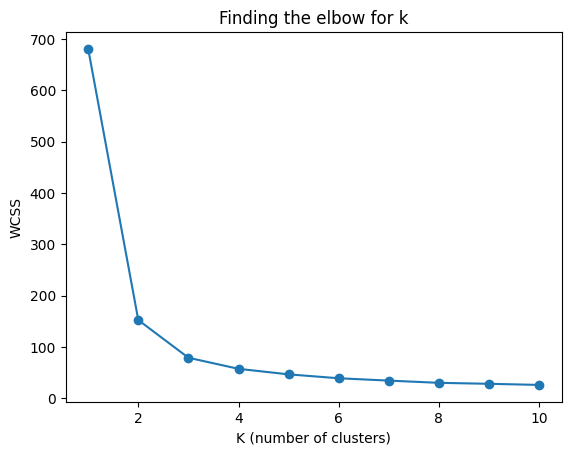

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Finding the elbow for k")
plt.xlabel("K (number of clusters)")
plt.ylabel("WCSS")
plt.show()

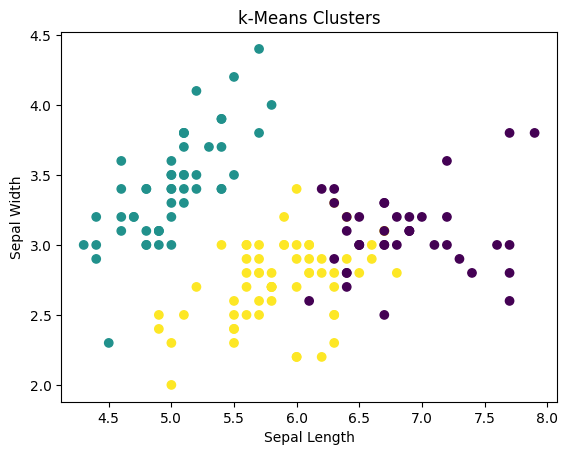

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("k-Means Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


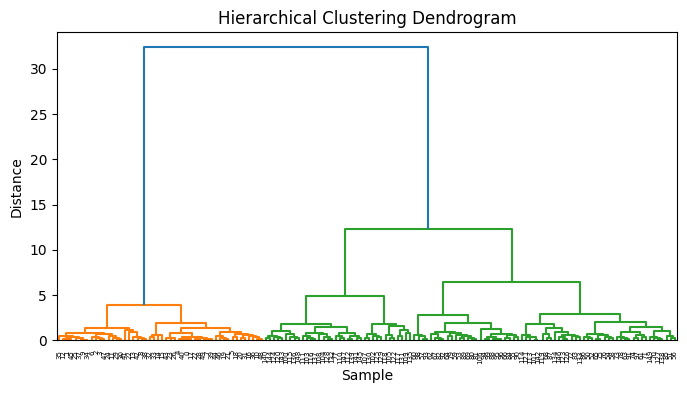

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(X, method="ward")
plt.figure(figsize=(8, 4))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample")
plt.ylabel("Distance")
plt.show()

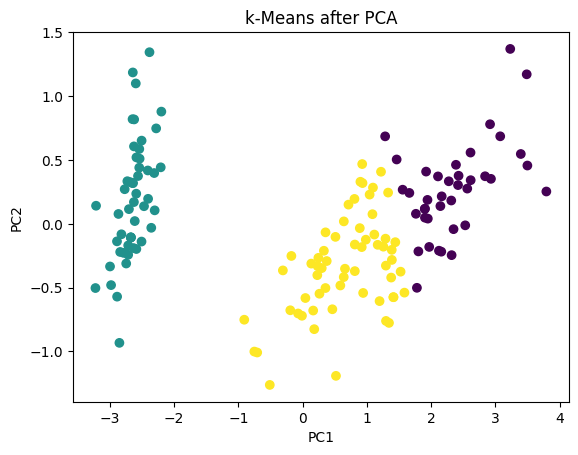

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis")
plt.title("k-Means after PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()